In [ ]:
#import math                It has been found that np.exp gives better results with the arrays than math.exp
#Programming notes
#For hyperprameter maybe use linspace and make the tuning automatic by saving the parameters of the best accurate model
#save the weights in an external file so we can skip this in the next run (optional for user)
#Date (25/22/2024)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd




In [ ]:
#Here i will import the extra libraries
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


In [ ]:
#Importing data and splitting them
df = pd.read_csv('ce889_dataCollection.csv') #Collecting data from the CSV file (ps: momken odam t5liha tt5ad men el user)
x=df.iloc[0:,:1] #this takes the coloumn i want ( remember [from which row : which row, from which coloumn : ....])
y=df.iloc[0:,1:2]
vx=df.iloc[0:,2:3]
vy=df.iloc[0:,3:4]

def scaling(column):
    return (column - column.min()) / (column.max() - column.min())



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#handling outliers by removing them since in this game the user might have gone to extreme places

def detect_outliers(df, threshold=3):
    z_scores = np.abs(zscore(df))
    return (z_scores > threshold).any(axis=1)  #now we have a mask of the outliers in outr data set

print(f"Number of rows before removing outliers{df.shape[0]}")
df = df[~detect_outliers(df)]
print(f"Number of rows after removing outliers{df.shape[0]}")

#after some trial and error with the theshold it has been found that 3 is the thershold with to act

Number of rows before removing outliers479465
Number of rows after removing outliers475604


# New Section

Number of rows before cleaning475604
Number of rows after cleaning475604


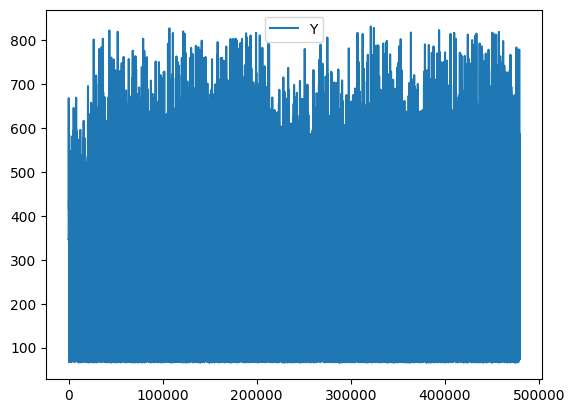

In [ ]:
#Pre_Processing
print(f"Number of rows before cleaning{df.shape[0]}")
df.dropna(inplace=True)
print(f"Number of rows after cleaning{df.shape[0]}")
y.plot(kind='line')  # Customize type (line, bar, etc.)
plt.show()

# New Section

In [ ]:
# Split data into training and testing sets
X_train, X_test,y_train, y_test, vx_train, vx_test, vy_train, vy_test = train_test_split(x,y,vx,vy, test_size=0.2, random_state=7)

# Print results
print("X1_train:\n", X_train.shape)
print("X1_test:\n", X_test.shape)
print("X2_train:\n", y_train.shape)
print("X2_test:\n", y_test.shape)
print("y1_train:\n", vx_train.shape)
print("y1_test:\n", vx_test.shape)
print("y2_train:\n", vy_train.shape)
print("y2_test:\n", vy_test.shape)

X1_train:
 (334435, 1)
X1_test:
 (83609, 1)
X2_train:
 (334435, 1)
X2_test:
 (83609, 1)
y1_train:
 (334435, 1)
y1_test:
 (83609, 1)
y2_train:
 (334435, 1)
y2_test:
 (83609, 1)


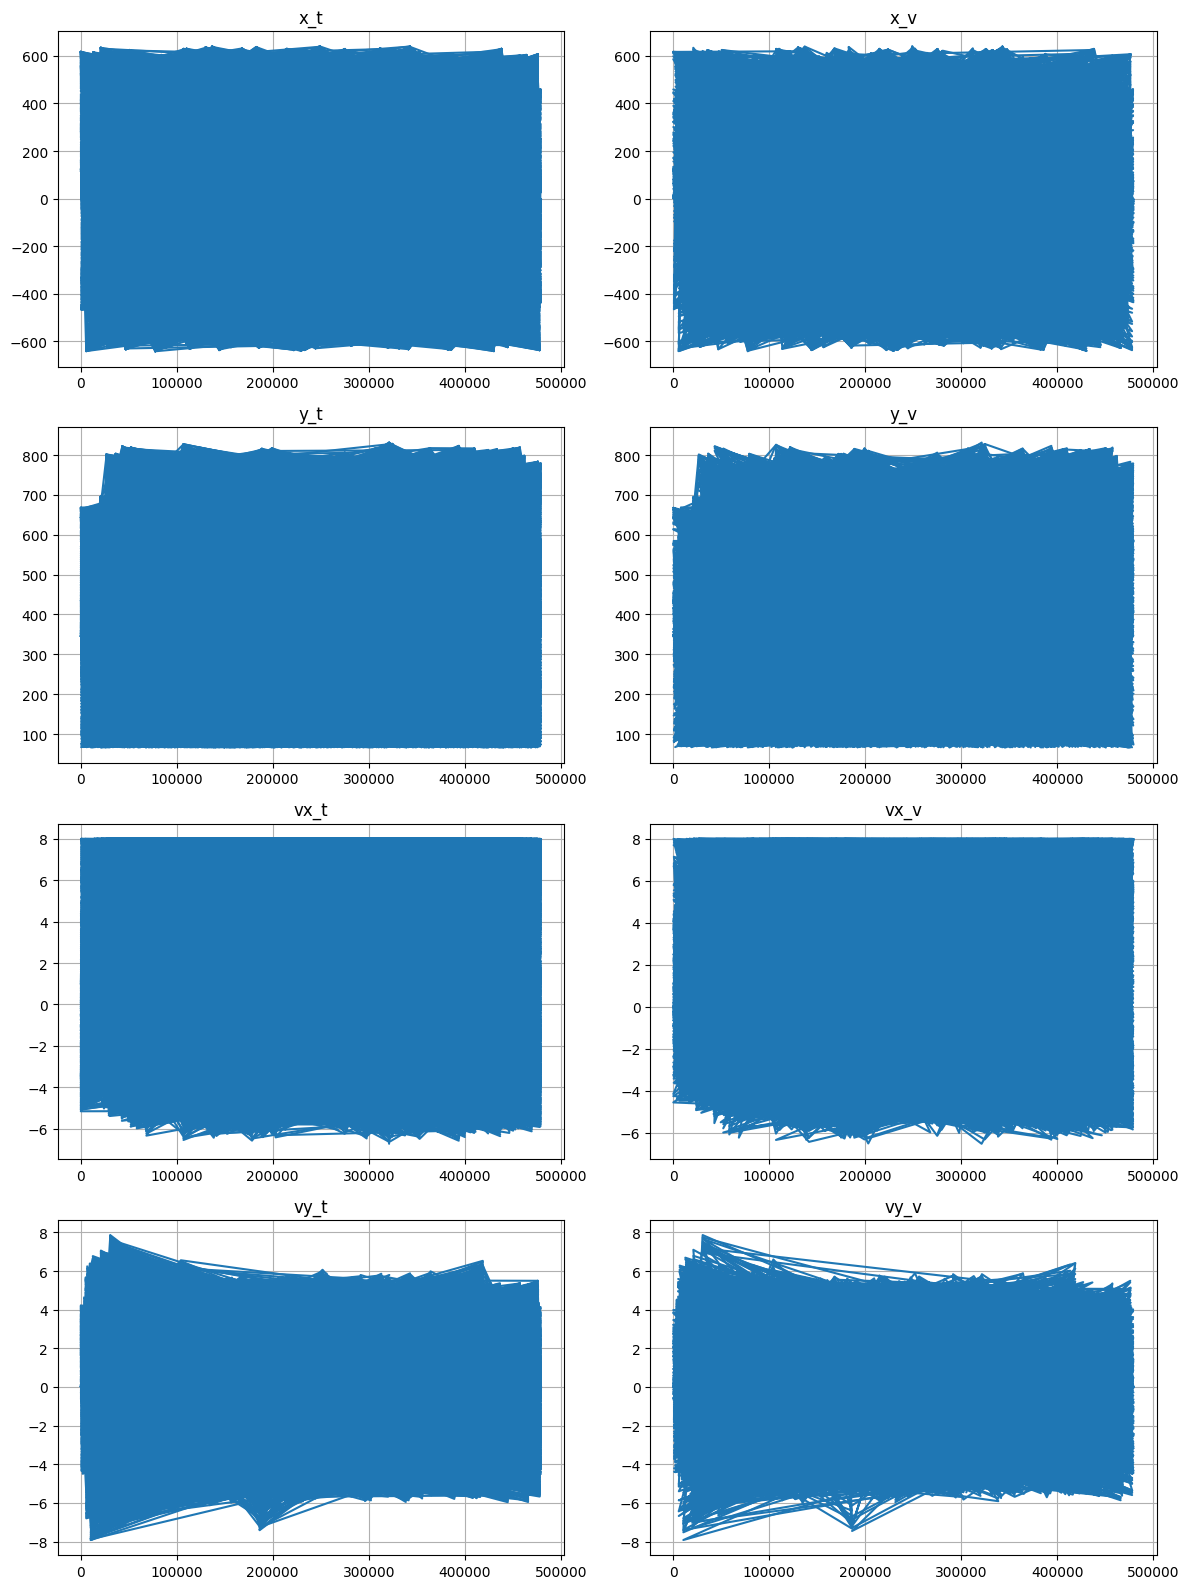

In [ ]:
#ploting training data and testing data to ensure that no major part is missing in either and the samples are well choosen
fig, axs = plt.subplots(4, 2, figsize=(12, 16))  #preparing a grid to place the figures in
mpl.rcParams['agg.path.chunksize'] = 10000
#Plot each array in its own subplot
arrays = [X_train, X_test, y_train, y_test, vx_train, vx_test, vy_train, vy_test]
titles = ['x_t', 'x_v', 'y_t', 'y_v', 'vx_t', 'vx_v', 'vy_t', 'vy_v']
#going through the arrays
for ax, array, title in zip(axs.flat, arrays, titles):
    ax.plot(array)
    ax.set_title(title)
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [ ]:
#Normalizing the inputs and predticted outputs
x_t=scaling(X_train).to_numpy()
x_v=scaling(X_test).to_numpy()
y_t=scaling(y_train).to_numpy()
y_v=scaling(y_test).to_numpy()
vx_t=scaling(vx_train).to_numpy()
vx_v=scaling(vx_test).to_numpy()
vy_t=scaling(vy_train).to_numpy()
vy_v=scaling(vy_test).to_numpy()

'''
# I will save the normalized values in another CSV file to use it in matlab and plot it whenever i want
df.iloc[0:, :1]=x
df.iloc[0:,1:2]=y
df.iloc[0:,2:3]=vx
df.iloc[0:,3:4]=vy
df.to_csv('Normalized.csv')
#Debugging prints unlock if needed only
#print(f"value of x is {x} and value of y is {y} and value of vx is {vx} and value of vy is {vy}")
#print("--------------------------------------")
#print("the maxxxxxx value is ",x.max)
#changing the style of the inputs to work as samples by vectorizing them (making them arrays)
x=np.array(x)
y=np.array(y)
vx=np.array(vx)
vy=np.array(vy)
'''
# Combine inputs and outputs
inputs = np.column_stack((x_t, y_t))  # Shape: (num_samples, 2)
print(inputs)
print(inputs.shape) #so shape[0] will be the number of samples that we will use in the for loop in each eppoch & shape[1] number of input neurons
actual_outputs = np.column_stack((vx_t, vy_t))  # Shape: (num_samples, 2)
inputs_val=np.column_stack((x_v,y_v))
outputs_val=np.column_stack((vx_v,vy_v))
print(actual_outputs)
print(actual_outputs.shape)

[[0.50725039 0.36178437]
 [0.43020407 0.37704879]
 [0.51943689 0.47283118]
 ...
 [0.72802216 0.47250947]
 [0.49275587 0.95159395]
 [0.51287039 0.40455382]]
(334435, 2)
[[0.8560521  0.50318416]
 [0.37127694 0.46832179]
 [0.85948564 0.50396718]
 ...
 [0.22631672 0.64488548]
 [0.56495699 0.56160226]
 [0.74101776 0.50185622]]
(334435, 2)


In [ ]:
#Now i will autotune the hyperparameters using grid search for different values (this might take long)
from itertools import product

#creating the grid for the 3 hyperparametrs i want to find the best values for
hyperparameters = {
    "learning_rate": np.linspace(0.01, 0.5, 10),  # Learning rate values between 0.01 and 0.5
    "momentum": np.linspace(0.1, 0.9, 5),  # Momentum values between 0.1 and 0.9
    "hidden_neurons": [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]  # Different numbers of neurons in the hidden layer
}

#i can use sklearn grid search function but i wanted to learn how to creat it myself (sklearn.model_selection.GridSearchCV)

def grid_search(grid, inputs,actual_outputs,inputs_val,outputs_val):

    param_name = list(grid.keys())
    param_values = list(grid.values())
    best_params = None
    best_score = 100000000000000.0 #starting with a big number and going down as we find a better score

    # Iterate through all combinations of hyperparameters
    for values in product(*param_values):
        hyperparams = dict(zip(param_name, values))
        print(f"Testing hyperparameters: {hyperparams}")

        # Train the model with current hyperparameters
        score = train_fn(train_neural_network,inputs,actual_outputs,inputs_val,outputs_val, **hyperparams)
        print(f"Validation score: {score}")

        # Update the best parameters if the current score is better
        if score < best_score:  # Change to `score > best_score` for metrics like accuracy
            best_score = score
            best_params = hyperparams

    return best_params, best_score



def train_fn(train_neural_network,inputs,actual_outputs,inputs_val,outputs_val,learning_rate, momentum, hidden_neurons):
    # Initialize network parameters
    global wsh, wsy, eta, mom, n_hidden_neurons
    eta = learning_rate
    mom = momentum
    n_hidden_neurons = hidden_neurons

    # Initialize weights and other parameters
    wsh = np.random.rand(inputs.shape[1], int(n_hidden_neurons))
    wsy = np.random.rand(int(n_hidden_neurons), actual_outputs.shape[1])

    #using my own training function to get the outputs (other option is to use a premade function train by sklearn)
    train_neural_network(epochs=50, momentum=mom, inputs=inputs, actual_outputs=actual_outputs)

    # Evaluate on validation set
    total_val_error = 0
    for i in range(inputs_val.shape[0]):
        # Forward pass for validation
        hidden_outputs = 1 / (1 + np.exp(-np.dot(inputs_val[i], wsh)))
        final_outputs = 1 / (1 + np.exp(-np.dot(hidden_outputs, wsy)))

        # Calculate error for both outputs
        error = np.mean(np.abs(final_outputs - outputs_val[i]))
        total_val_error += error

    return total_val_error / inputs_val.shape[0]  #  #returning the error to calculate the score

best_params, best_score = grid_search(hyperparameters,inputs,actual_outputs,inputs_val,outputs_val)

print("Best Hyperparameters:", best_params)
print("Best Validation Score:", best_score)


Testing hyperparameters: {'learning_rate': 0.01, 'momentum': 0.1, 'hidden_neurons': 7}


NameError: name 'train_neural_network' is not defined

In [ ]:
#Initialization of Variables
#actual_outputs = [vx, vy]
#inputs = [x, y]
eta = 0.1  # Learning rate and will act as lamda as well for now
mom = 0.1  # Momentum

#Size configuration to insure shape and multiplaction working smoothly
n_inputs = inputs.shape[1]
n_hidden_neurons = 13 #according to matylab trial and error
n_outputs = actual_outputs.shape[1] #changable to be len(actual_outputs) if we are using a hardcoded example

#Weights with random values
wsh = np.random.rand(n_inputs, n_hidden_neurons)  # Input to hidden layer weights
wsy = np.random.rand(n_hidden_neurons, n_outputs)  # Hidden to output layer weights

# Initialize momentum updates
prev_dwsh = np.zeros_like(wsh)
prev_dwsy = np.zeros_like(wsy)


In [ ]:
# Class to create layers as objects (so we will have 2 layers hidden and output as 2 main objects)
class neuron:
    def __init__(self, inps, ws):
        self.inps = np.array(inps)
        #self.inps = np.append(self.inps,1)                                #unlock this line if you want to add bias
        self.ws = np.array(ws)
        self.vs = np.dot(self.inps, self.ws)  # Weighted sum
        self.hiddens = np.zeros(self.ws.shape[1])  # Initialize hidden activations
        self.outputs = np.zeros(self.ws.shape[1])  # Initialize output activations
        self.es = np.zeros(len(actual_outputs))  # Error initialization
        self.gd_ys = np.zeros(self.ws.shape[1])  # Output layer delta
        self.gd_hs = np.zeros(self.ws.shape[1])  # Hidden layer delta

    def activation(self, layer):
        # Sigmoid activation function
        if layer == 'h':
            self.hiddens = 1 / (1 + np.exp(-0.9*self.vs))
            return self.hiddens
        else:
            self.outputs = 1 / (1 + np.exp(-0.9*self.vs))
            return self.outputs

    def error_calc(self, actual_outputs):
        self.es = np.array(actual_outputs)  - self.outputs
        return self.es
# Back prob
    def gradient_y(self):
        # Output layer gradients
        self.gd_ys = eta * self.es * self.outputs * (1 - self.outputs)
        return self.gd_ys

    def gradient_h(self, delta_ys, wsy):
        # Hidden layer gradients
        summation = np.dot(delta_ys, np.array(wsy).T)
        self.gd_hs = eta * summation * self.hiddens * (1 - self.hiddens)
        return self.gd_hs

    def update_hidden_weights(self, eta, prev_dwsh, momentum):
        global wsh
        dw = eta * np.outer(self.inps, self.gd_hs) + momentum * prev_dwsh
        wsh += dw
        return dw

    def update_output_weights(self, hidden, eta, prev_dwsy, momentum):
        global wsy
        dw = eta * np.outer(hidden, self.gd_ys) + momentum * prev_dwsy
        wsy += dw
        return dw


In [ ]:
def train_neural_network(epochs, momentum, inputs, actual_outputs):
    rmse_training = np.zeros(epochs)
    rmse_validation = np.zeros(epochs)
    global prev_dwsh, prev_dwsy

    for epoch in range(epochs):
        total_error = 0  # Avg error for training
        for i in range(inputs.shape[0]):
            # Step 1: Forward Pass - Hidden Layer
            hidden_neuron = neuron(inputs[i], wsh)
            hidden_outputs = hidden_neuron.activation('h')

            # Step 2: Forward Pass - Output Layer
            output_neuron = neuron(hidden_outputs, wsy)
            output_values = output_neuron.activation('o')

            # Step 3: Calculate Error
            error = output_neuron.error_calc(actual_outputs[i])
            sqr_error = np.square(error)
            total_error += np.mean(sqr_error)

            # Step 4: Backward Pass
            output_neuron.gradient_y()
            hidden_neuron.gradient_h(output_neuron.gd_ys, wsy)

            # Step 5: Update Weights
            prev_dwsh = hidden_neuron.update_hidden_weights(eta, prev_dwsh, momentum)
            prev_dwsy = output_neuron.update_output_weights(hidden_outputs, eta, prev_dwsy, momentum)

        RMSE_t = np.sqrt(total_error / inputs.shape[0])
        rmse_training[epoch] = RMSE_t

        # Validation
        total_val_error = 0
        for i in range(inputs_val.shape[0]):
            hidden_outputs = 1 / (1 + np.exp(-np.dot(inputs_val[i], wsh)))
            final_outputs = 1 / (1 + np.exp(-np.dot(hidden_outputs, wsy)))
            error = (final_outputs - outputs_val[i])
            total_val_error += np.mean(np.square(error))

        RMSE_v = np.sqrt(total_val_error / inputs_val.shape[0])
        rmse_validation[epoch] = RMSE_v

        # Print results for this epoch
        print(f"Epoch {epoch + 1}/{epochs}")
        print("Training RMSE:", RMSE_t)
        print("Validation RMSE:", RMSE_v)
        print("--------------------------------------------------")

    # Plotting RMSE
    plt.plot(rmse_training, label='Training RMSE')
    plt.plot(rmse_validation, label='Validation RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

In [ ]:
# Run the training with user-defined epochs and momentum
epochs = int(input("Enter the number of epochs for training: "))
train_neural_network(epochs, mom, inputs, actual_outputs)

Enter the number of epochs for training: 70
Epoch 1/70
Training RMSE: 0.20255996647406097
Validation RMSE: 0.1907203433264913
--------------------------------------------------
Epoch 2/70
Training RMSE: 0.18654570055661004
Validation RMSE: 0.18559859155227112
--------------------------------------------------
Epoch 3/70
Training RMSE: 0.18128458626730568
Validation RMSE: 0.1826357816403063
--------------------------------------------------
Epoch 4/70
Training RMSE: 0.17880926982019443
Validation RMSE: 0.18229205900000056
--------------------------------------------------
Epoch 5/70
Training RMSE: 0.17775656755944855
Validation RMSE: 0.18146859704723048
--------------------------------------------------
Epoch 6/70
Training RMSE: 0.17662709373035865
Validation RMSE: 0.17988607610989701
--------------------------------------------------
Epoch 7/70
Training RMSE: 0.17505058738999293
Validation RMSE: 0.1775852323874174
--------------------------------------------------
Epoch 8/70
Training R

KeyboardInterrupt: 